In [1]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [2]:
#由于数据集比较大，制作小样本数据
#设置小样本数据大小
max_size = 100000
size = 0
with open("sample.csv","wb") as writer:
    with open("tianchi_fresh_comp_train_user.csv","rb") as file:
        for line in file.readlines():
            if size < max_size:
                writer.write(line)
                size +=1


In [3]:
# 数据加载
df = pd.read_csv("./sample.csv")
print(df.shape)
df.head()

(99999, 6)


,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11


In [4]:
# 计算cvr，转化率：购买率
#各行为计数：1：浏览；2：收藏；3：加购；4：购买
count_usr = df['behavior_type'].value_counts()
print(count_usr)
count_all = count_usr[1] + count_usr[2] + count_usr[3] + count_usr[4] #4种行为合计
count_4 = count_usr[4] #购买行为
cvr = count_4 / count_all #转化率，购买行为数量/所有行为数量
print('cvr = {}%'.format(cvr*100))

1    94558
3     2992
2     1448
4     1001
Name: behavior_type, dtype: int64
cvr = 1.0010100101001012%


In [5]:
# 将time特征转化为datetime类型并设置为index
df['time'] = pd.to_datetime(df['time'])
df.index = df['time']
df.drop(['time'],axis = 1,inplace = True)
print(df.head())

                      user_id    item_id  behavior_type user_geohash  \
time                                                                   
2014-12-08 18:00:00  10001082  285259775              1      97lk14c   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-02 15:00:00  10001082   53616768              1          NaN   
2014-12-12 11:00:00  10001082  151466952              1          NaN   

                     item_category  
time                                
2014-12-08 18:00:00           4076  
2014-12-12 12:00:00           5503  
2014-12-12 12:00:00           5503  
2014-12-02 15:00:00           9762  
2014-12-12 11:00:00           5232  


In [6]:
def show_count_day(df):
    #统计每天样本数量并展示
    count_day = {}
    #从2014年11月18日到2014年12月18日
    start = '2014-11-17'
    #字符串转化为时间
    temp_date = datetime.strptime(start,'%Y-%m-%d')
    delta = timedelta(days = 1)
    for i in range(31):
        temp_date = temp_date + delta
        #时间转化为字符串
        temp_str = temp_date.strftime('%Y-%m-%d')
        #print(temp_str)
        #统计df里每天的样本数量
        count_day[temp_str] = df.loc[temp_str].shape[0]
    #print(count_day)
    #将字典类型转化为DataFrame    
    df_count_day = pd.DataFrame.from_dict(count_day,orient = 'index',columns = ['count'])
    plt.figure(figsize = (12,8))
    df_count_day['count'].plot(kind = 'bar')
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

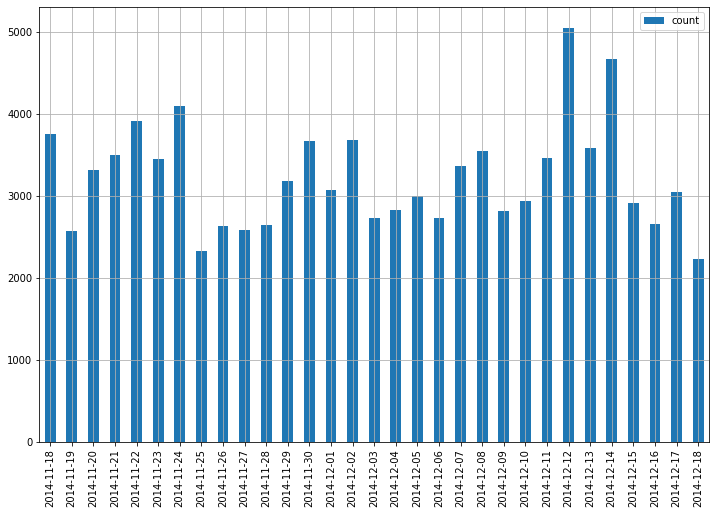

In [7]:
show_count_day(df)

In [8]:
#属于商品P的操作次数
df_p = pd.read_csv('./tianchi_fresh_comp_train_item.csv')
df_p.head()

,item_id,item_geohash,item_category
0,100002303,NaN,3368
1,100003592,NaN,7995
2,100006838,NaN,12630
3,100008089,NaN,7791
4,100012750,NaN,9614


In [9]:
# sample和item表融合
print(df.shape)
df = pd.merge(df.reset_index(),df_p,on = ['item_id']).set_index(['time']) #reset_index将index还原
print(df.shape)
print(df.head())

(99999, 5)
(12913, 7)
                      user_id    item_id  behavior_type user_geohash  \
time                                                                   
2014-12-03 01:00:00  10001082  275221686              1          NaN   
2014-12-13 14:00:00  10001082  275221686              1          NaN   
2014-12-08 07:00:00  10001082  275221686              1          NaN   
2014-12-08 07:00:00  10001082  275221686              1          NaN   
2014-12-08 00:00:00  10001082  275221686              1          NaN   

                     item_category_x item_geohash  item_category_y  
time                                                                
2014-12-03 01:00:00            10576          NaN            10576  
2014-12-13 14:00:00            10576          NaN            10576  
2014-12-08 07:00:00            10576          NaN            10576  
2014-12-08 07:00:00            10576          NaN            10576  
2014-12-08 00:00:00            10576          NaN          

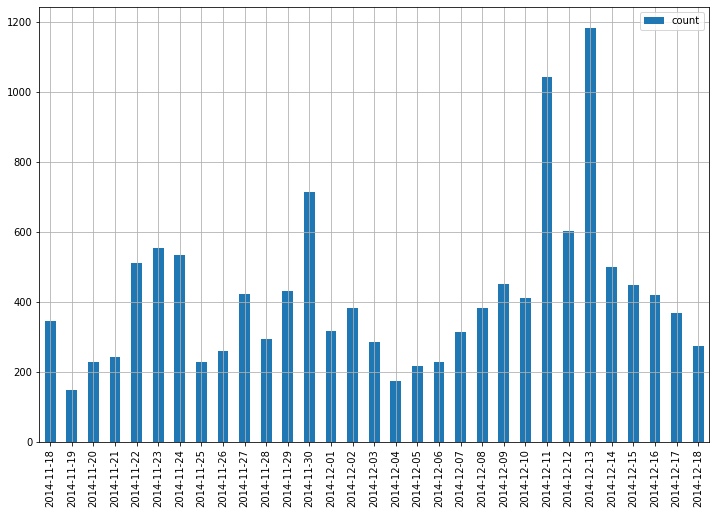

In [10]:
show_count_day(df)

In [11]:
#基于小时的时间分析，指定某个日期
def count_show_hour(date1):
    count_hour = {}
    #设置初始值
    for i in range(24):
        time_str = date1 + ' %02d'%i
        count_hour[time_str] = [0,0,0,0]
    
    for i in range(24):
        time_str = date1 + ' %02d'%i #每小时
        temp = df.loc[time_str]['behavior_type'].value_counts() #每小时行为计数
        #print(temp)
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j] -1] += temp[temp.index[j]]#每小时行为计数
    #print(count_hour)
    df_count_hour = pd.DataFrame.from_dict(count_hour,orient = 'index')
    plt.figure(figsize = (12,8))
    df_count_hour.plot(kind = 'bar')
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()   

<Figure size 864x576 with 0 Axes>

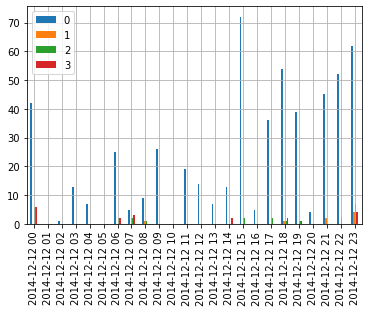

In [12]:
count_show_hour('2014-12-12')

In [13]:
# 分批加载数据，得到行为中包含3-加购物车和4-购买的数据集
batch = 0
for df in pd.read_csv(open('./tianchi_fresh_comp_train_user.csv','r'),chunksize = 100000):
#     print(df.head())
#     print(df.columns())
    df_act_34 = df[df['behavior_type'].isin([3,4])] #包含行为3，4的数据
    #因为有多个chunk,所以mode为a
    df_act_34.to_csv('./act_34.csv',columns = ['time','user_id','item_id','behavior_type'],index = False,header = False,mode = 'a')
    batch = batch +1
    if batch % 30 == 0:
        print('chunk %d done'%batch)

chunk 30 done
chunk 60 done
chunk 90 done
chunk 120 done
chunk 150 done
chunk 180 done
chunk 210 done


In [14]:
# 加载处理后含有行为3，4的数据
dateparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d %H')
data = pd.read_csv('./act_34.csv',parse_dates = [0],date_parser =dateparse,index_col = False)
data.columns = ['time','user_id','item_id','behavior_type']
print(data.shape)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


(4460079, 4)


In [15]:
data.head()

,time,user_id,item_id,behavior_type
0,2014-12-14 03:00:00,10001082,220586551,4
1,2014-12-02 22:00:00,10001082,275221686,4
2,2014-12-02 16:00:00,10001082,141312432,4
3,2014-12-13 00:00:00,100029775,287413918,4
4,2014-12-12 15:00:00,100029775,222229697,3


In [16]:
#存在行为3的数据
data_time_3 = data[data['behavior_type'] == 3][['user_id','item_id','time']]
# data_time_3.info()
data_time_3.columns = ['user_id','item_id','time3']
#存在行为4的数据
data_time_4 = data[data['behavior_type'] == 4][['user_id','item_id','time']]
data_time_4.columns = ['user_id','item_id','time4']
data_time_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162894 entries, 0 to 4460078
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   user_id  1162894 non-null  int64         
 1   item_id  1162894 non-null  int64         
 2   time4    1162894 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 35.5 MB


In [17]:
# 融合数据
data_time = pd.merge(data_time_3,data_time_4,on = ['user_id','item_id'],how = 'left')
data_time.info()
data_time.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7623930 entries, 0 to 7623929
Data columns (total 4 columns):
 #   Column   Dtype         
---  ------   -----         
 0   user_id  int64         
 1   item_id  int64         
 2   time3    datetime64[ns]
 3   time4    datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 290.8 MB


,user_id,item_id,time3,time4
0,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00
1,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00
2,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00
3,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00
4,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00


In [18]:
# 同时有行为3，4的数据，用于训练
data_time_train = data_time.dropna()
data_time_train.reset_index(drop= True,inplace =True)
data_time_train.info()
data_time_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126025 entries, 0 to 5126024
Data columns (total 4 columns):
 #   Column   Dtype         
---  ------   -----         
 0   user_id  int64         
 1   item_id  int64         
 2   time3    datetime64[ns]
 3   time4    datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 156.4 MB


,user_id,item_id,time3,time4
0,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00
1,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00
2,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00
3,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00
4,100029775,222229697,2014-12-12 15:00:00,2014-12-12 15:00:00


In [19]:
# 求加购（行为3）到购买（行为4）的时间差
delta_time = data_time_train['time4'] - data_time_train['time3']
delta_time.head()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
dtype: timedelta64[ns]

In [20]:
# 按照小时来统计时间间隔
delta_hour = []
for i in range(len(delta_time)):
    d_hour = delta_time[i].days*24 + delta_time[i]._h
    if d_hour < 0:
        #无效数据，放弃
        continue
    else:
        delta_hour.append(d_hour)

# print(delta_hour)    

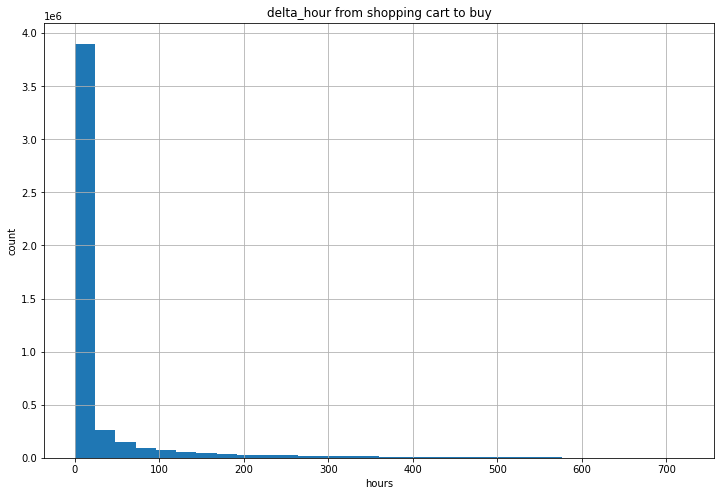

In [21]:
# delta_hour直方图可视化
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.hist(delta_hour,bins =30)
plt.xlabel('hours')
plt.ylabel('count')
plt.title('delta_hour from shopping cart to buy')
plt.grid(True)
plt.show()

In [22]:
# 只有行为3的数据，用于预测
data_time_X = data_time[data_time['time4'].isnull()].drop(['time4'],axis =1)
data_time_X.index = data_time_X['time3']
data_time_X.drop(['time3'],axis=1,inplace =True)
data_time_X.info()
data_time_X.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2497905 entries, 2014-12-15 07:00:00 to 2014-11-24 20:00:00
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   item_id  int64
dtypes: int64(2)
memory usage: 57.2 MB


,user_id,item_id
time3,,
2014-12-15 07:00:00,100068031,296527651
2014-12-15 06:00:00,100068031,187577314
2014-12-18 17:00:00,100068031,150442941
2014-12-15 06:00:00,100068031,102448108
2014-11-18 10:00:00,100087810,66903742


In [24]:
#2014年12月18日加入购物车的用户
ui_pred = data_time_X.loc['2014-12-18']
#商品子集P
P = pd.read_csv('./tianchi_fresh_comp_train_item.csv',index_col = False)
# 2014年12月18日加入购物车的商品交集
ui_pred_in_P = pd.merge(ui_pred,P,on = ['item_id'])
ui_pred_in_P.head()

,user_id,item_id,item_geohash,item_category
0,100442521,85464552,NaN,7876
1,100442521,85464552,NaN,7876
2,100442521,85464552,NaN,7876
3,100442521,85464552,NaN,7876
4,100442521,85464552,NaN,7876


In [26]:
# 使用简单规则预测：2014年12月18日加入购物车的用户会产生购买
ui_pred_in_P.to_csv('./submit_purchase_pred.csv',columns = ['user_id','item_id'],index = False)